#### Newton Polynomial 3D

In [1]:
import time
import numpy as np
import minterpy as mp
import matplotlib.pyplot as plt

In [2]:
# SECTION : SUBSECTION
    # (markdown introduction)
    # METHODS : DESCRIPTION
    # PARAMETERS : DESCRIPTION
    # COMPUTATIONS : DESCRIPTION
    # OUTPUTS : DESCRIPTION

#### NP (3D) : Interpolation

In [3]:
# Methods

def runge_function(x):
    
    return 1 / (1 + 25*(x[:,0]**2 + x[:,1]**2 + x[:,2]**2))

In [4]:
# Parameters

points_x = points_y = points_z = 10

spatial_dimension = 3
poly_degree = 40
p_degree = 2.0

x, y, z,  = np.linspace(-1, 1, points_x), np.linspace(-1, 1, points_y), np.linspace(-1, 1, points_z)

grid = np.flip(mp.utils.cartesian_product(z, y, x), axis=1)
X, Y, Z = np.meshgrid(x, y, z)

In [5]:
# COMPUTATIONS : Interpolant

start1 = time.time()

n_p = mp.interpolate(
    runge_function,
    spatial_dimension = spatial_dimension,
    poly_degree = poly_degree,
    lp_degree = p_degree)

end1= time.time()

In [6]:
# Computations : Runtime

runtime_i = np.round((end1-start1) * 10e5) / 10e2

In [7]:
# Outputs : Runtime

print(f"Interpolation time = {runtime_i}ms")

Interpolation time = 55149.847ms


#### NP (3D) : Evaluation

In [8]:
# COMPUTATIONS : runge function

gt = runge_function(grid).reshape(points_x, points_y, points_z) # ground truth

In [9]:
# Computations : Evaluation via minterpy

start2 = time.time()

n_p_eval = n_p(grid).reshape(points_x, points_y, points_z)

end2 = time.time()

In [10]:
# Computations : Runtime

runtime_e = np.round((end2-start2)*10e5)/10e2

In [11]:
# Computations : Relative MSRE, relative MRE amd the AOC

rel_eps = np.abs(((n_p_eval-gt)/gt).reshape(-1))

msre = np.mean(rel_eps**2)

mre = np.max(rel_eps)

aoc = len(mp.core.utils.get_exponent_matrix(spatial_dimension, poly_degree, p_degree))

In [12]:
# Outputs : Runtime

print(f"Evaluation time = {runtime_e}ms")

Evaluation time = 311.082ms


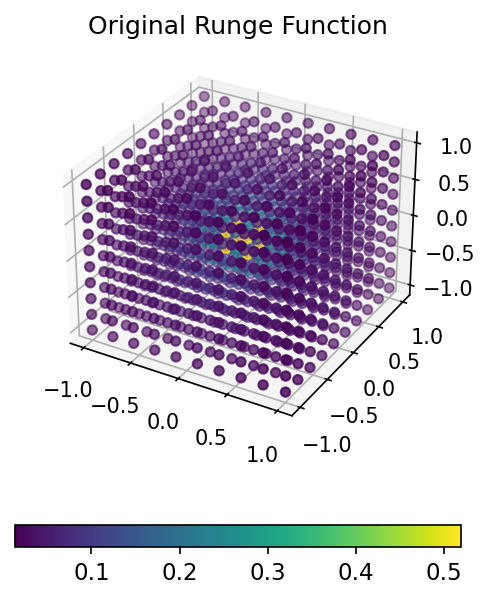

In [13]:
# Outputs : Original runge function (ground truth)
fig = plt.figure(figsize=(18*0.8, 6*0.8), dpi=150)
ax1 = fig.add_subplot(131, projection='3d')
sc = ax1.scatter(X, Y, Z, c=gt, cmap='viridis')
ax1.set_title('Original Runge Function')
ax1.set_xticks(np.linspace(min(x), max(x), 5))
ax1.set_yticks(np.linspace(min(y), max(y), 5))
ax1.set_zticks(np.linspace(min(z), max(z), 5))
cbar = plt.colorbar(sc, ax=ax1,  orientation="horizontal", shrink=0.7)
cbar.ax.tick_params(labelsize=11)  
plt.tight_layout(pad=3.0)
plt.show()


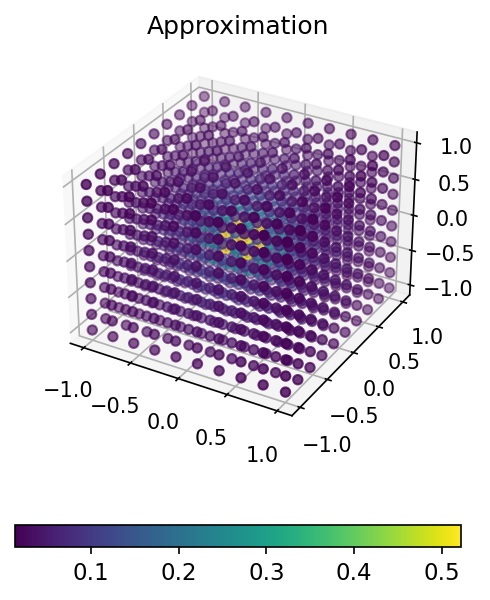

In [14]:
# Outputs : Approximation
fig = plt.figure(figsize=(18*0.8, 6*0.8), dpi=150)
ax1 = fig.add_subplot(131, projection='3d')
sc = ax1.scatter(X, Y, Z, c=n_p_eval, cmap='viridis')
ax1.set_title('Approximation')
ax1.set_xticks(np.linspace(min(x), max(x), 5))
ax1.set_yticks(np.linspace(min(y), max(y), 5))
ax1.set_zticks(np.linspace(min(z), max(z), 5))
cbar = plt.colorbar(sc, ax=ax1,  orientation="horizontal", shrink=0.7)
cbar.ax.tick_params(labelsize=11)  
plt.tight_layout(pad=3.0)
plt.show()


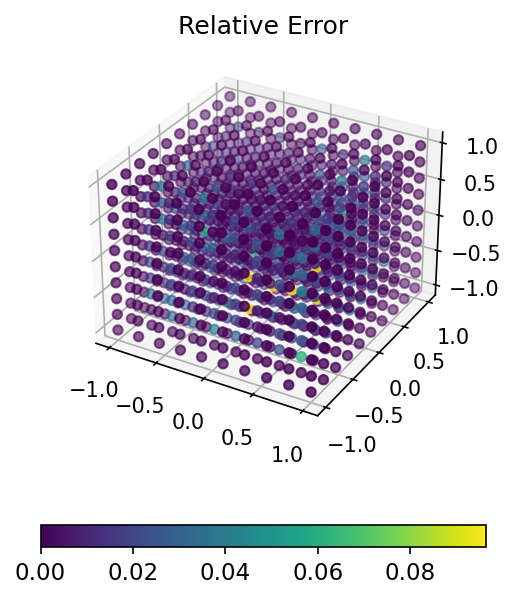

In [15]:
# Outputs : Relative Error
fig = plt.figure(figsize=(18*0.8, 6*0.8), dpi=150)
ax1 = fig.add_subplot(131, projection='3d')
sc = ax1.scatter(X, Y, Z, c=np.abs((n_p_eval - gt) / gt), cmap='viridis')
ax1.set_title('Relative Error')
ax1.set_xticks(np.linspace(min(x), max(x), 5))
ax1.set_yticks(np.linspace(min(y), max(y), 5))
ax1.set_zticks(np.linspace(min(z), max(z), 5))
cbar = plt.colorbar(sc, ax=ax1,  orientation="horizontal", shrink=0.7)
cbar.ax.tick_params(labelsize=11)  
plt.tight_layout(pad=3.0)
plt.show()


In [16]:
# Outputs : Relative MSRE, relative MRE and the AOC

print(f'Mean Squared Relative Error = {msre}')
print(f'Maximal Relative Error = {mre}')
print(f'Amount of Coefficients = {aoc}')

Mean Squared Relative Error = 0.00018822703430132067
Maximal Relative Error = 0.09642685290797588
Amount of Coefficients = 35385
